In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [153]:
net = cv2.dnn.readNetFromDarknet('yolov4-tiny-custom.cfg','yolov4-tiny-custom_last.weights')

In [156]:
classes = []
with open('traffic.names','r') as f:
    classes = [line.strip() for line in f.readlines()]

In [157]:
classes

['speed_50',
 'speed_70',
 'speed_100',
 'keep_right',
 'go_straight',
 'stop',
 'speed_60',
 'speed_30',
 'speed_80',
 'no_entry',
 'pedestrian_crossing',
 'no_overtaking',
 'keep_left',
 'no_overtaking_trucks',
 'speed_120']

In [209]:
img = cv2.imread('F:/College/Senior_2_semester_2/driver/eg dataset/20210421_0039150518.jpg')
img = cv2.resize(img,(1280,720))

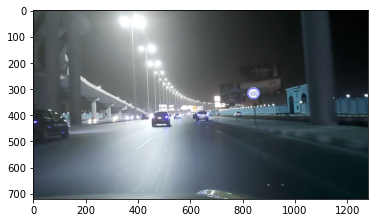

In [210]:
plt.imshow(img)

In [211]:
h,w,_=img.shape

In [212]:
blob = cv2.dnn.blobFromImage(img,1/255,(416,416),(0,0,0),swapRB = True,crop=False)

In [213]:
blob.shape

(1, 3, 416, 416)

In [214]:
net.setInput(blob)

In [215]:
last_layer = net.getUnconnectedOutLayersNames()

In [216]:
layer_out = net.forward(last_layer)

In [217]:
boxes = []
confidences = []
class_ids = []
for output in layer_out:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > .5:
            center_x = int(detection[0]*w)
            center_y = int(detection[1]*h)
            wb = int(detection[2]*w)
            hb = int(detection[3]*h)
            x = int(center_x-wb/2)
            y = int(center_y-hb/2)
            boxes.append([x,y,wb,hb])
            confidences.append((float(confidence)))
            class_ids.append(class_id)

In [218]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences,.5,.4)
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size = (len(boxes),3))

In [219]:
indexes

array([[0]], dtype=int32)

In [220]:
for i in indexes.flatten():
    x,y,wb,hb = boxes[i]
    label = str(classes[class_ids[i]])
    confidence = str(round(confidences[i],2))
    color = colors[i]
    cv2.rectangle(img,(x,y),(x+wb,y+hb),color,2)
    cv2.putText(img,label+" "+confidence,(x,y+20),font,2,(0,0,0),2)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()